# Web Scraping IMDb Movie List

Introduction
we aim to scrape movie data from IMDb's list of the most popular movies from 2018. By extracting relevant information such as titles, years, runtimes, genres, ratings, we can create a comprehensive dataset for further analysis or application development.

In [1]:
# Import Libraries
import requests  # For sending HTTP requests
from bs4 import BeautifulSoup  # For parsing HTML content
import pandas as pd  # For working with data frames
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
%matplotlib inline

In [2]:
# Send request and parse HTML
url = 'https://www.imdb.com/list/ls058813655/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>2018 Movie List - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/list/ls058813655/" rel="canonical"/>
<meta content="http://www.imdb.com/list/ls058813655/" property="og:url">
<script>
    if (typeof uet == 'function') {
    

In [3]:
movies = []
for item in soup.find_all('div', class_='lister-item mode-detail'):
        movie = {}
        
        # Movie title and year
        title_element = item.find('h3', class_='lister-item-header').find('a')
        movie['Title'] = title_element.text.strip()
        movie['Year'] = title_element.find_next('span', class_='lister-item-year').text.strip('()')
        
        # Rating (if available)
        rating_tag = item.find('div', class_='ipl-rating-widget')
        movie['Rating'] = rating_tag.find('span', class_='ipl-rating-star__rating').text.strip() if rating_tag else ''
        
        # Genre
        details = item.find('p', class_='text-muted text-small').find_all('span')
        movie['Genre'] = details[4].text.strip() if details and len(details) > 4 else ''
        
        movies.append(movie)

In [4]:
df = pd.DataFrame(movies)

In [5]:
df.head()

,Title,Year,Rating,Genre
0,Avengers: Infinity War,2018,8.4,"Action, Adventure, Sci-Fi"
1,Aquaman,2018,6.8,"Action, Adventure, Fantasy"
2,Solo: A Star Wars Story,2018,6.9,"Action, Adventure, Sci-Fi"
3,Fantastic Beasts: The Crimes of Grindelwald,2018,6.5,"Adventure, Family, Fantasy"
4,Black Panther,2018,7.3,"Action, Adventure, Sci-Fi"


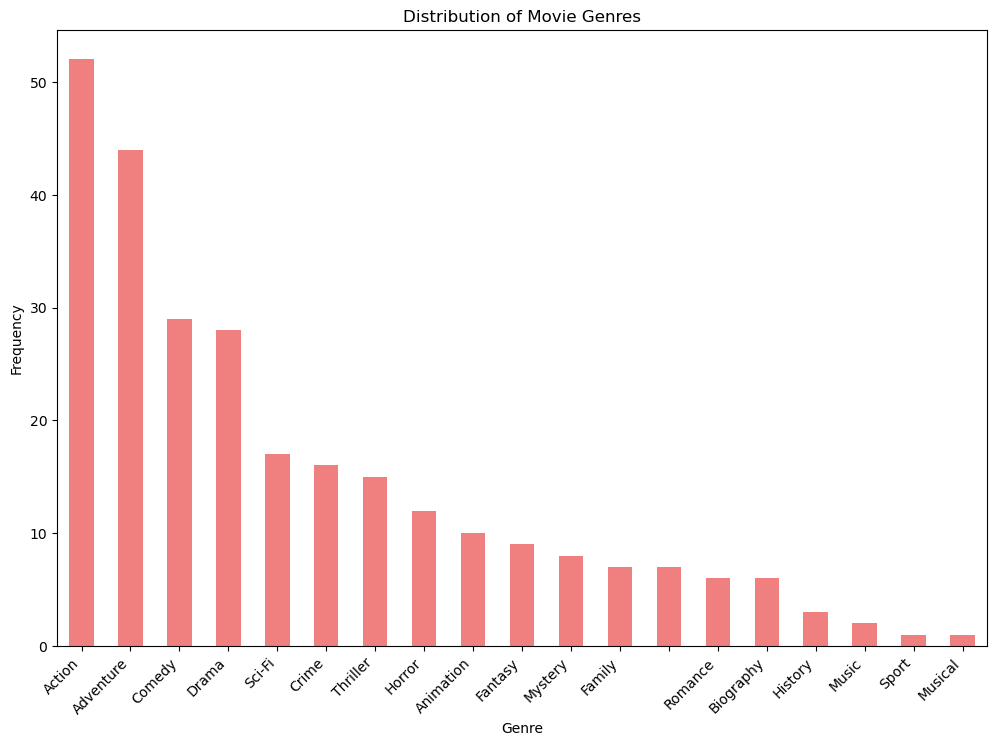

In [6]:
# Splitting genres into individual categories
genres = df['Genre'].str.split(',', expand=True).stack().str.strip()

# Plotting distribution of movie genres
plt.figure(figsize=(12, 8))
genres.value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()
